### Step 1: Importing and Merging Data


In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline

In [4]:
# Importing dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [5]:
#Checking the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [6]:
#let's look at the statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [8]:
# we can observe that there are select values in many columns because customer did not select any option from the list.
#So they are as good as NULL.Hence convert them into null values 
lead_data = lead_data.replace(['Select'], np.nan)
lead_data


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


### Handling the Missing values

In [9]:
#Finding percentage of missing values in each column.
round(100*(lead_data.isnull().sum()/len(lead_data)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#Dropping column with high null values 
lead_data.drop(["How did you hear about X Education", "Lead Profile"], axis = 1 , inplace= True)

In [11]:
round(100*(lead_data.isnull().sum()/len(lead_data)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
#Handling "Lead Quality"
lead_data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

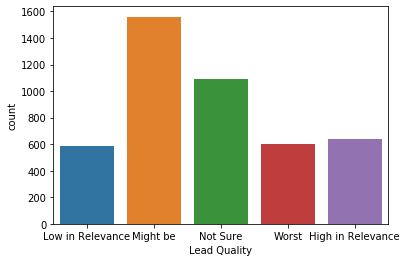

In [13]:
sns.countplot(lead_data['Lead Quality'])

In [14]:
# 'Lead Quality' is based on intuition of employee , so replace NaN with 'Not Sure'
lead_data['Lead Quality'] = lead_data['Lead Quality'].replace(np.nan, 'Not Sure')

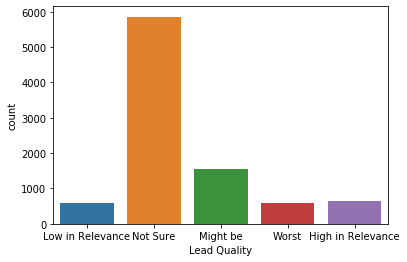

In [15]:
sns.countplot(lead_data['Lead Quality'])

Next high percentage null value columns are Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score  

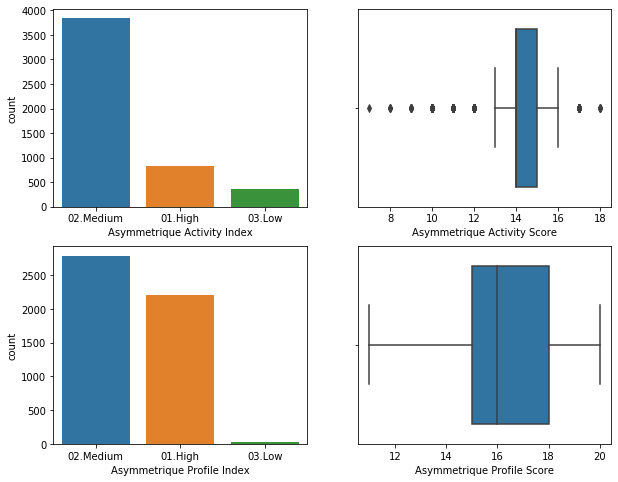

In [16]:
fig, axs = plt.subplots(2,2, figsize = (10,8))
sns.countplot(lead_data['Asymmetrique Activity Index'], ax = axs[0,0])
sns.boxplot(lead_data['Asymmetrique Activity Score'], ax = axs[0,1])
sns.countplot(lead_data['Asymmetrique Profile Index'], ax = axs[1,0])
sns.boxplot(lead_data['Asymmetrique Profile Score'], ax = axs[1,1])
fig.show()

In [17]:
#These columns have 45% missing values and skewness we drop them
lead_data.drop(["Asymmetrique Activity Index","Asymmetrique Activity Score","Asymmetrique Profile Index","Asymmetrique Profile Score"],axis = 1 , inplace= True)


In [18]:
# Handling 'City' column
lead_data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

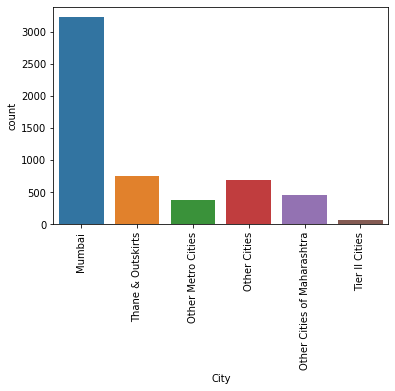

In [19]:
sns.countplot(lead_data.City)
xticks(rotation= 90)

In [20]:
lead_data['City'].mode()

0    Mumbai
dtype: object

In [21]:
# Hence we can replace the missing values in the 'City' column with mode value
lead_data['City'] = lead_data['City'].replace(np.NaN, 'Mumbai')


In [22]:
#Handling Specilization
lead_data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

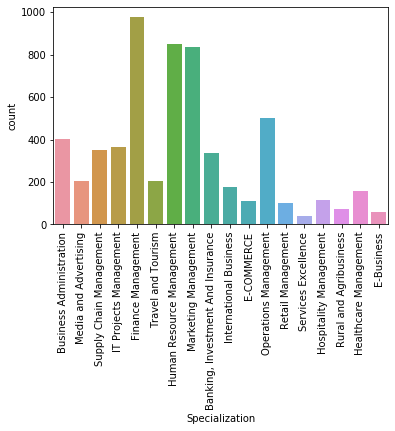

In [23]:
sns.countplot(lead_data.Specialization)
xticks(rotation = 90)

In [24]:
# we can add "others" category to specialization column as the spcialization might not had been present in the listed categories
lead_data['Specialization'] = lead_data['Specialization'].replace(np.NaN, 'Others')

In [25]:
round(100*(lead_data.isnull().sum()/len(lead_data)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [26]:
#Handling Tags Column
lead_data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [27]:
lead_data.Tags.mode()

0    Will revert after reading the email
dtype: object

In [28]:
# We can impute the missing values in Tag column by "Will revert after reading the email" 
lead_data['Tags'] = lead_data['Tags'].replace(np.NaN, "Will revert after reading the email")

In [29]:
# Handling "What matters most to you in choosing a course" column
lead_data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [30]:
# Imputing with "Better Career Prospects" 
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.NaN, 'Better Career Prospects')

In [31]:
# Handling Occupation column
lead_data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [32]:
# Imputing with "unemployed" 
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.NaN, 'Unemployed')

In [33]:
# Handling 'Country' column
lead_data['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [34]:
# Imputing null values in 'Country' with 'India' 
lead_data['Country'] = lead_data['Country'].replace(np.NaN, 'India')

In [35]:
round(100*(lead_data.isnull().sum()/len(lead_data)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [36]:
lead_data.shape

(9240, 31)

In [37]:
#dropping the remaining null values as it is very less precentage
lead_data.dropna(inplace = True)

In [38]:
lead_data.shape

(9074, 31)

In [39]:
round(100*(lead_data.isnull().sum()/len(lead_data)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

### step-3: Exploratory Data Analysis

#### Converted column

In [40]:
# Here 'Converted' is the target variable . 
lead_data.Converted.describe()

count    9074.000000
mean        0.378554
std         0.485053
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64

This shows that around 38% leads have been successfully converted

#### Lead Origin

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

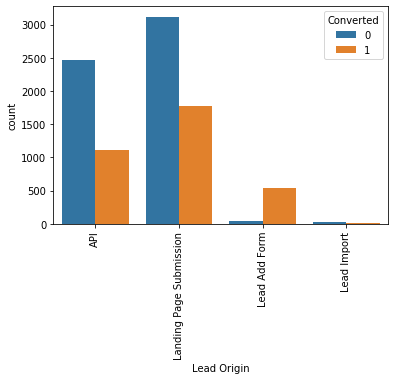

In [41]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data)
xticks(rotation = 90)

1. API and Landing page submission's have more number of leads than Add form and imports
2. Lead Add froms has very high conversion rate but less number of leads

#### Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

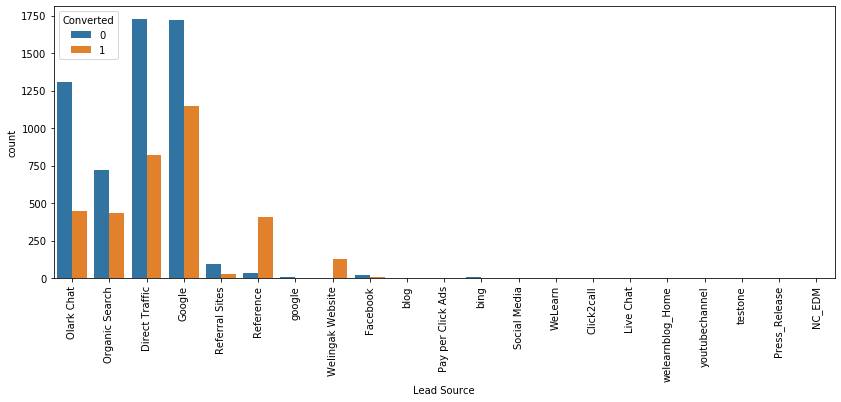

In [42]:
fig, axs = plt.subplots(figsize = (14,5))
sns.countplot(x="Lead Source", hue = "Converted", data = lead_data)
xticks(rotation = 90)

1. Most number of leads are from Direct Traffic and Google 
2. Welingak  Website has best conversion ratio among all

#### Do Not Email

In [43]:
lead_data['Do Not Email'].value_counts(normalize= True)

No     0.921093
Yes    0.078907
Name: Do Not Email, dtype: float64

#### Do Not Call

In [44]:
lead_data['Do Not Call'].value_counts(normalize= True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

#### Total Visits

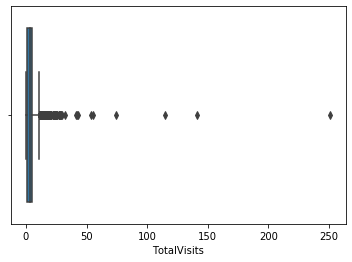

In [45]:
sns.boxplot(lead_data['TotalVisits'])

In [46]:
# As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

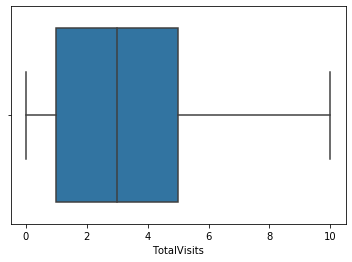

In [47]:
sns.boxplot(lead_data['TotalVisits'])

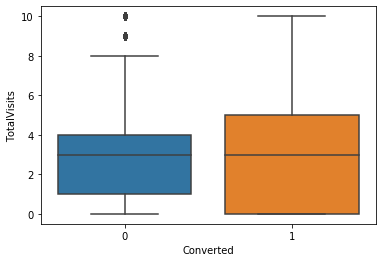

In [48]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)

#### Total time spent on website

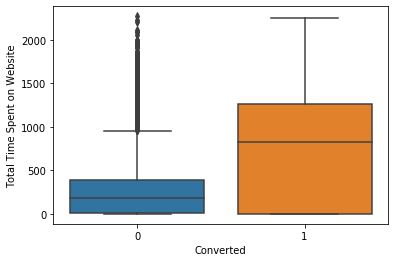

In [49]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)

Spending more time on websites results in leads getting successfully converted

#### Page views per visit

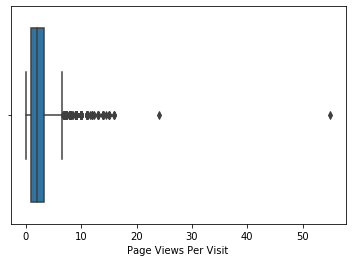

In [50]:
sns.boxplot(lead_data['Page Views Per Visit'])

Outliers are present in the data, so we should perform capping

In [51]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

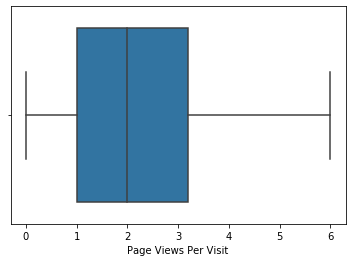

In [52]:
sns.boxplot(lead_data['Page Views Per Visit'])

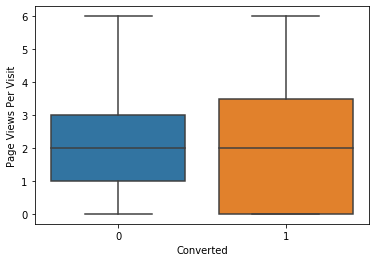

In [53]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data)

#### Last Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

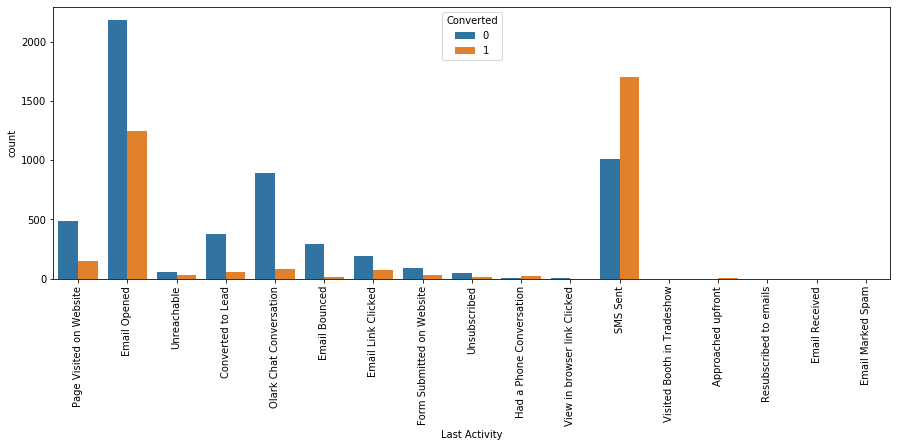

In [54]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
xticks(rotation = 90)

1. Most of the lead have their Email opened as their last activity.
2. And Conversion rate with last activity as SMS Sent is high

#### Country

In [55]:
lead_data.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

Almost all values are India

#### Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

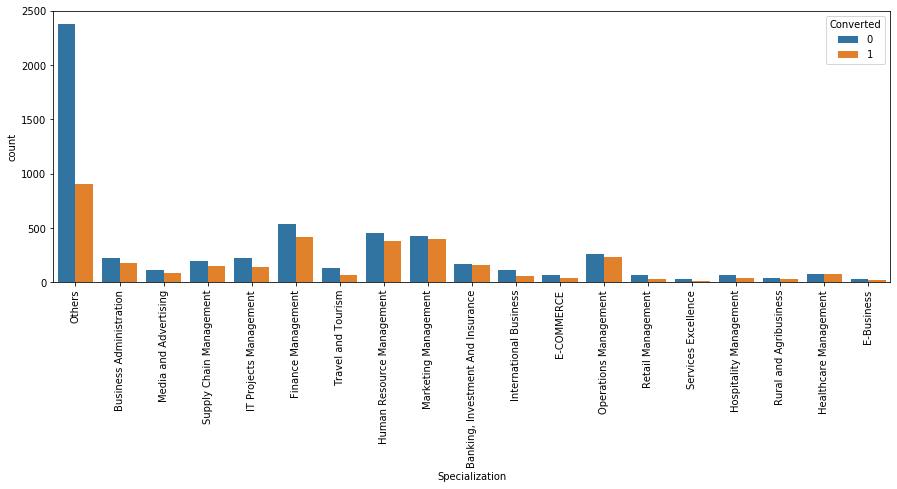

In [56]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data)
xticks(rotation = 90)

In [57]:
lead_data.Specialization.value_counts(normalize =True)

Others                               0.361693
Finance Management                   0.105687
Human Resource Management            0.092242
Marketing Management                 0.090699
Operations Management                0.054992
Business Administration              0.043972
IT Projects Management               0.040335
Supply Chain Management              0.038131
Banking, Investment And Insurance    0.036919
Media and Advertising                0.022261
Travel and Tourism                   0.022261
International Business               0.019396
Healthcare Management                0.017192
Hospitality Management               0.012233
E-COMMERCE                           0.012233
Retail Management                    0.011020
Rural and Agribusiness               0.008045
E-Business                           0.006282
Services Excellence                  0.004408
Name: Specialization, dtype: float64

'Other' specialization has more number of leads and conversions

#### Occupation

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

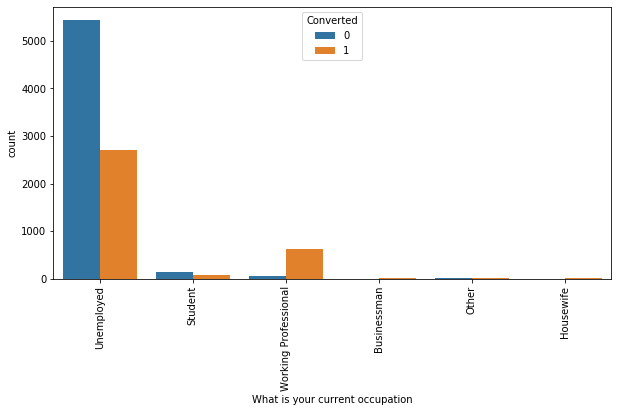

In [58]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data)
xticks(rotation = 90)

1. 'Unemployed' category has more number of leads.
2.  And Conversion rate is very high in "Working Professional" category

#### Lead Quality

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

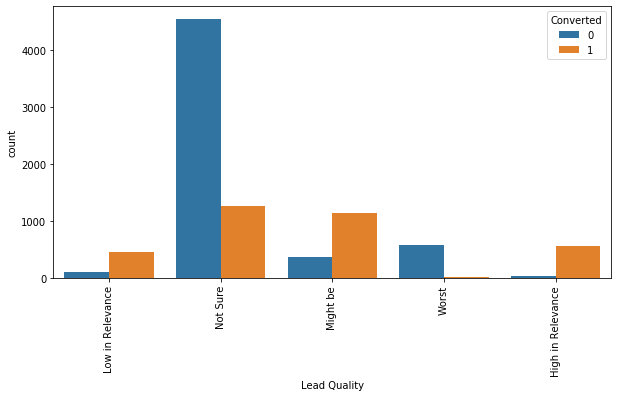

In [59]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = lead_data)
xticks(rotation = 90)

Lot of leads belongs to "Not Sure" category

#### City

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

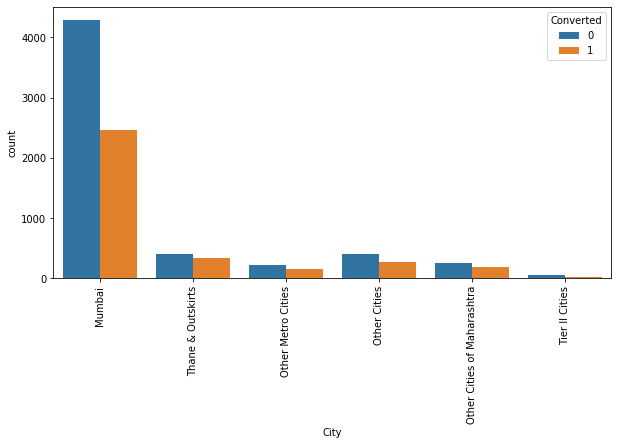

In [60]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = lead_data)
xticks(rotation = 90)

Most number of leads are from "Mumbai" city.

In [61]:
lead_data['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

The Column is highly skewed

In [62]:
lead_data['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

The Column is highly skewed

In [63]:
lead_data['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

The Column is highly skewed

In [64]:
lead_data['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

The Column is highly skewed

#### Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

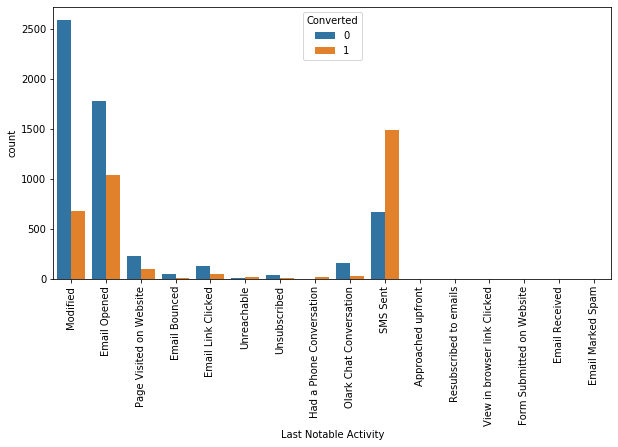

In [65]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data)
xticks(rotation = 90)

In [66]:
# Many columns are not so relevant for our goal , so we can drop them
lead_data = lead_data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Tags','Lead Quality'],1)

In [67]:
lead_data.shape

(9074, 14)

In [68]:
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


### Step-4: Data Preparation 

### Creating Dummies for Categorical variables

In [69]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                            'City','Last Notable Activity','Specialization']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [70]:
# Adding the result to the main dataframe
lead_data = pd.concat([lead_data, dummy], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,1,0,0,0,0,0


In [71]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function 
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [72]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','City','Last Notable Activity','Specialization'], axis = 1)

In [73]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Step 5: Test-Train Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [76]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [77]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


### Step 6: Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# Checking the Conversion Rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

This shows that around 38% leads have been successfully converted

### Step 7: Model Building

#### Running Your First Training Model

In [80]:
import statsmodels.api as sm

In [81]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6266
Model Family:                Binomial   Df Model:                           84
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2527.5
Date:                Mon, 01 Jun 2020   Deviance:                       5054.9
Time:                        19:29:33   Pearson chi2:                 6.40e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   26.3470   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.5418      0.227     -6.806      0.000      -1.986      -1.098
Do Not Call                                             22.5786   5.15e+04      0.000      1.000   -1.01e+05    1.01e+05
TotalVisits                                              0.2985      0.057      5.225      0.000       0.186       0.410
Total Time Spent on Website                              1.1074      0.042     26.603      0.000       1.026       1.189
Page Views Per Visit                                    -0.3181      0.064     -4.990      0.000      -0.443      -0.193
Lead Origin_Landing Page Submission                     -0.9161      0.139     -6.587      0.000      -1.189      -0.644
Lead Origin_Lead Add Form                               -0.6052      1.486     -0.407      0.684      -3.517       2.306
Lead Origin_Lead Import                                 23.8712   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -2.5602      1.968     -1.301      0.193      -6.417       1.297
Lead Source_Facebook                                   -25.2863   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                      -2.2150      1.967     -1.126      0.260      -6.069       1.639
Lead Source_Live Chat                                   22.6332   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      21.0749   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                  -1.2484      1.959     -0.637      0.524      -5.088       2.591
Lead Source_Organic Search                              -2.4169      1.970     -1.227      0.220      -6.278       1.444
Lead Source_Pay per Click Ads                          -23.7503   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -23.9401   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    1.5802      1.299      1.216      0.224      -0.967       4.127
Lead Source_Referral Sites                              -2.5607      1.996     -1.283      0.199      -6.472       1.351
Lead Source_Social Media                                -0.4000      2.505     -0.160      0.873      -5.310       4.510
Lead Source_WeLearn                                   1.542e-09      1e-05      0.000      1.000   -1.96e-05    1.96e-05
Lead Source_Welingak Website                             4

### Step 8: Feature Selection Using RFE

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [83]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [84]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False])

In [85]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 19),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Source_Direct Traffic', False, 32),
 ('Lead Source_Facebook', False, 70),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_NC_EDM', False, 13),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Pay per Click Ads', False, 54),
 ('Lead Source_Press_Release', False, 48),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 16),
 ('Lead Source_WeLearn', False, 73),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 50),
 ('Lead Source_blog', False, 39),
 ('Lead Source_google', False, 30),
 ('Lead Source_testone', F

In [86]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed', 'Specialization_Others'],
      dtype='object')

In [87]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',

##### Assessing the model with StatsModels

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.4
Date:                Mon, 01 Jun 2020   Deviance:                       5272.8
Time:                        19:29:39   Pearson chi2:                 6.28e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1083      0.114      0.953      0.341      -0.114       0.331
Do Not Email                                            -1.7672      0.183     -9.662      0.000      -2.126      -1.409
Total Time Spent on Website                              0.9757      0.037     26.465      0.000       0.903       1.048
Lead Origin_Landing Page Submission                     -1.4768      0.121    -12.218      0.000      -1.714      -1.240
Lead Origin_Lead Add Form                                2.7585      0.227     12.158      0.000       2.314       3.203
Lead Source_Welingak Website                             2.6605      0.760      3.501      0.000       1.171       4.150
Last Activity_Converted to Lead                         -1.3399      0.216     -6.210      0.000      -1.763      -0.917
Last Activity_Had a Phone Conversation                   1.3662      1.139      1.200      0.230      -0.866       3.598
Last Activity_Olark Chat Conversation                   -1.2420      0.164     -7.567      0.000      -1.564      -0.920
What is your current occupation_Housewife               22.7632   1.52e+04      0.001      0.999   -2.98e+04    2.98e+04
What is your current occupation_Working Professional     2.6136      0.192     13.597      0.000       2.237       2.990
Last Notable Activity_Had a Phone Conversation           1.9198      1.581      1.214      0.225      -1.179       5.019
Last Notable Activity_SMS Sent                           1.5928      0.080     19.984      0.000       1.437       1.749
Last Notable Activity_Unreachable                        1.6228      0.472      3.435      0.001       0.697       2.549
Last Notable Activity_Unsubscribed                       1.6904      0.512      3.302      0.001       0.687       2.694
Specialization_Others                                   -1.0827      0.123     -8.797      0.000      -1.324      -0.841
========================================================================================================================
"""

In [89]:
col1 = col.drop('What is your current occupation_Housewife',1)

In [90]:
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed', 'Specialization_Others'],
      dtype='object')

In [91]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.8
Date:                Mon, 01 Jun 2020   Deviance:                       5281.5
Time:                        19:29:39   Pearson chi2:                 6.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1138      0.114      1.002      0.316      -0.109       0.336
Do Not Email                                            -1.7706      0.183     -9.681      0.000      -2.129      -1.412
Total Time Spent on Website                              0.9752      0.037     26.480      0.000       0.903       1.047
Lead Origin_Landing Page Submission                     -1.4762      0.121    -12.225      0.000      -1.713      -1.240
Lead Origin_Lead Add Form                                2.7720      0.227     12.233      0.000       2.328       3.216
Lead Source_Welingak Website                             2.6473      0.760      3.484      0.000       1.158       4.137
Last Activity_Converted to Lead                         -1.3435      0.216     -6.228      0.000      -1.766      -0.921
Last Activity_Had a Phone Conversation                   1.3643      1.139      1.198      0.231      -0.868       3.597
Last Activity_Olark Chat Conversation                   -1.2443      0.164     -7.580      0.000      -1.566      -0.923
What is your current occupation_Working Professional     2.6093      0.192     13.574      0.000       2.233       2.986
Last Notable Activity_Had a Phone Conversation           1.9157      1.581      1.211      0.226      -1.184       5.015
Last Notable Activity_SMS Sent                           1.5883      0.080     19.936      0.000       1.432       1.744
Last Notable Activity_Unreachable                        1.6182      0.472      3.426      0.001       0.692       2.544
Last Notable Activity_Unsubscribed                       1.6895      0.512      3.301      0.001       0.686       2.693
Specialization_Others                                   -1.0871      0.123     -8.840      0.000      -1.328      -0.846
========================================================================================================================
"""

In [92]:
col2 = col1.drop('Last Activity_Had a Phone Conversation',1)

In [93]:
col2

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed', 'Specialization_Others'],
      dtype='object')

In [94]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.5
Date:                Mon, 01 Jun 2020   Deviance:                       5283.1
Time:                        19:29:39   Pearson chi2:                 6.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1150      0.114      1.013      0.311      -0.108       0.338
Do Not Email                                            -1.7697      0.183     -9.674      0.000      -2.128      -1.411
Total Time Spent on Website                              0.9762      0.037     26.512      0.000       0.904       1.048
Lead Origin_Landing Page Submission                     -1.4765      0.121    -12.227      0.000      -1.713      -1.240
Lead Origin_Lead Add Form                                2.7706      0.227     12.227      0.000       2.326       3.215
Lead Source_Welingak Website                             2.6458      0.760      3.482      0.000       1.156       4.135
Last Activity_Converted to Lead                         -1.3461      0.216     -6.240      0.000      -1.769      -0.923
Last Activity_Olark Chat Conversation                   -1.2476      0.164     -7.602      0.000      -1.569      -0.926
What is your current occupation_Working Professional     2.6085      0.192     13.571      0.000       2.232       2.985
Last Notable Activity_Had a Phone Conversation           3.2792      1.098      2.987      0.003       1.128       5.431
Last Notable Activity_SMS Sent                           1.5862      0.080     19.916      0.000       1.430       1.742
Last Notable Activity_Unreachable                        1.6164      0.472      3.422      0.001       0.691       2.542
Last Notable Activity_Unsubscribed                       1.6864      0.512      3.294      0.001       0.683       2.690
Specialization_Others                                   -1.0841      0.123     -8.818      0.000      -1.325      -0.843
========================================================================================================================
"""

#### Checking VIFs

In [95]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,3.41
10,Last Notable Activity_Unreachable,3.40
3,Lead Origin_Lead Add Form,1.55
11,Last Notable Activity_Unsubscribed,1.43
2,Lead Origin_Landing Page Submission,1.42
4,Lead Source_Welingak Website,1.36
7,What is your current occupation_Working Profes...,1.33
1,Total Time Spent on Website,1.19
0,Do Not Email,1.18
9,Last Notable Activity_SMS Sent,1.18


In [97]:
col3 = col2.drop('Last Notable Activity_Had a Phone Conversation',1)

In [98]:
col3

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed', 'Specialization_Others'],
      dtype='object')

In [99]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.1
Date:                Mon, 01 Jun 2020   Deviance:                       5298.2
Time:                        19:29:40   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1304      0.113      1.151      0.250      -0.092       0.352
Do Not Email                                            -1.7754      0.183     -9.715      0.000      -2.134      -1.417
Total Time Spent on Website                              0.9741      0.037     26.505      0.000       0.902       1.046
Lead Origin_Landing Page Submission                     -1.4786      0.120    -12.274      0.000      -1.715      -1.242
Lead Origin_Lead Add Form                                2.7621      0.227     12.193      0.000       2.318       3.206
Lead Source_Welingak Website                             2.6518      0.760      3.489      0.000       1.162       4.141
Last Activity_Converted to Lead                         -1.3546      0.216     -6.282      0.000      -1.777      -0.932
Last Activity_Olark Chat Conversation                   -1.2544      0.164     -7.646      0.000      -1.576      -0.933
What is your current occupation_Working Professional     2.6036      0.192     13.557      0.000       2.227       2.980
Last Notable Activity_SMS Sent                           1.5763      0.080     19.819      0.000       1.420       1.732
Last Notable Activity_Unreachable                        1.6054      0.472      3.399      0.001       0.680       2.531
Last Notable Activity_Unsubscribed                       1.6821      0.512      3.288      0.001       0.679       2.685
Specialization_Others                                   -1.0952      0.123     -8.926      0.000      -1.336      -0.855
========================================================================================================================
"""

In [100]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,3.41
10,Last Notable Activity_Unsubscribed,3.40
3,Lead Origin_Lead Add Form,1.55
11,Specialization_Others,1.43
2,Lead Origin_Landing Page Submission,1.42
4,Lead Source_Welingak Website,1.36
7,What is your current occupation_Working Profes...,1.33
1,Total Time Spent on Website,1.19
0,Do Not Email,1.18
9,Last Notable Activity_Unreachable,1.18


In [101]:
col4 = col3.drop('Last Activity_Olark Chat Conversation',1)

In [102]:
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2684.5
Date:                Mon, 01 Jun 2020   Deviance:                       5369.0
Time:                        19:29:41   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0266      0.111     -0.239      0.811      -0.245       0.191
Do Not Email                                            -1.7519      0.184     -9.525      0.000      -2.112      -1.391
Total Time Spent on Website                              0.9898      0.037     27.043      0.000       0.918       1.062
Lead Origin_Landing Page Submission                     -1.3875      0.119    -11.612      0.000      -1.622      -1.153
Lead Origin_Lead Add Form                                2.9357      0.226     12.966      0.000       2.492       3.379
Lead Source_Welingak Website                             2.6708      0.760      3.513      0.000       1.181       4.161
Last Activity_Converted to Lead                         -1.2364      0.216     -5.721      0.000      -1.660      -0.813
What is your current occupation_Working Professional     2.6348      0.193     13.640      0.000       2.256       3.013
Last Notable Activity_SMS Sent                           1.6949      0.079     21.474      0.000       1.540       1.850
Last Notable Activity_Unreachable                        1.7292      0.473      3.654      0.000       0.802       2.657
Last Notable Activity_Unsubscribed                       1.7797      0.514      3.462      0.001       0.772       2.787
Specialization_Others                                   -1.1834      0.122     -9.734      0.000      -1.422      -0.945
========================================================================================================================
"""

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Working Profes...,3.41
10,Specialization_Others,3.40
3,Lead Origin_Lead Add Form,1.55
2,Lead Origin_Landing Page Submission,1.42
4,Lead Source_Welingak Website,1.36
7,Last Notable Activity_SMS Sent,1.33
1,Total Time Spent on Website,1.19
0,Do Not Email,1.18
9,Last Notable Activity_Unsubscribed,1.18
5,Last Activity_Converted to Lead,1.08


In [104]:
col5 = col4.drop('What is your current occupation_Working Professional',1)

In [105]:
X_train_sm = sm.add_constant(X_train[col5])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2819.9
Date:                Mon, 01 Jun 2020   Deviance:                       5639.7
Time:                        19:29:41   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.2865      0.107      2.690      0.007       0.078       0.495
Do Not Email                           -1.7784      0.179     -9.957      0.000      -2.128      -1.428
Total Time Spent on Website             0.9973      0.036     27.884      0.000       0.927       1.067
Lead Origin_Landing Page Submission    -1.5317      0.115    -13.271      0.000      -1.758      -1.306
Lead Origin_Lead Add Form               3.0503      0.223     13.702      0.000       2.614       3.487
Lead Source_Welingak Website            2.5348      0.760      3.335      0.001       1.045       4.024
Last Activity_Converted to Lead        -1.1434      0.205     -5.566      0.000      -1.546      -0.741
Last Notable Activity_SMS Sent          1.7054      0.077     22.173      0.000       1.555       1.856
Last Notable Activity_Unreachable       1.7401      0.463      3.760      0.000       0.833       2.647
Last Notable Activity_Unsubscribed      1.8842      0.480      3.922      0.000       0.943       2.826
Specialization_Others                  -1.4705      0.118    -12.450      0.000      -1.702      -1.239
=======================================================================================================
"""

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Notable Activity_SMS Sent,3.41
3,Lead Origin_Lead Add Form,1.55
2,Lead Origin_Landing Page Submission,1.42
4,Lead Source_Welingak Website,1.36
7,Last Notable Activity_Unreachable,1.33
1,Total Time Spent on Website,1.19
0,Do Not Email,1.18
9,Specialization_Others,1.18
5,Last Activity_Converted to Lead,1.08
8,Last Notable Activity_Unsubscribed,1.01


In [107]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.197013
1012    0.006479
9226    0.112027
4750    0.890802
7987    0.682834
1281    0.798088
2880    0.106771
4971    0.979975
7536    0.815739
1248    0.647402
dtype: float64

In [108]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19701295, 0.0064789 , 0.11202659, 0.89080214, 0.68283397,
       0.79808781, 0.10677115, 0.97997473, 0.81573911, 0.64740213])

In [109]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.197013,3009
1,0,0.006479,1012
2,0,0.112027,9226
3,1,0.890802,4750
4,1,0.682834,7987


In [110]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)


In [111]:
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.197013,3009,0
1,0,0.006479,1012,0
2,0,0.112027,9226,0
3,1,0.890802,4750,1
4,1,0.682834,7987,1


In [112]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)


[[3387  518]
 [ 850 1596]]


In [113]:

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.7846008502598016


## Metrics beyond simply accuracy

In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6524938675388389

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.8673495518565941

In [117]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1326504481434059


In [118]:
# positive predictive value 
print (TP / float(TP+FP))

0.7549668874172185


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7993863582723625


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

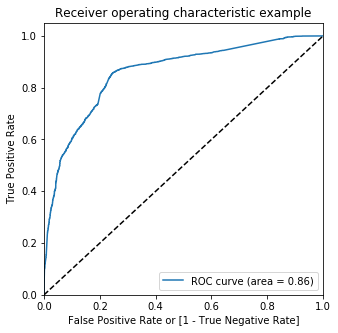

In [122]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.197013,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.006479,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.112027,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.890802,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.682834,7987,1,1,1,1,1,1,1,1,0,0,0


In [124]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.467643  0.992641  0.138796
0.2   0.2  0.759408  0.883892  0.681434
0.3   0.3  0.793891  0.855274  0.755442
0.4   0.4  0.790427  0.784955  0.793854
0.5   0.5  0.784601  0.652494  0.867350
0.6   0.6  0.781137  0.557236  0.921383
0.7   0.7  0.768540  0.480376  0.949040
0.8   0.8  0.737994  0.371218  0.967734
0.9   0.9  0.701464  0.244890  0.987452


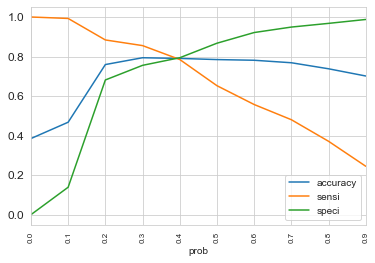

In [168]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1 , step =0.1), size = 8)
xticks(rotation = 90)
plt.yticks(size =12)
plt.show()

In [126]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.197013,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.006479,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.112027,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.890802,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.682834,7987,1,1,1,1,1,1,1,1,0,0,0,1


#### Assigning Lead Score

In [127]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.197013,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.006479,1012,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0.112027,9226,0,1,1,0,0,0,0,0,0,0,0,0,11
3,1,0.890802,4750,1,1,1,1,1,1,1,1,1,1,0,1,89
4,1,0.682834,7987,1,1,1,1,1,1,1,1,0,0,0,1,68


In [128]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives



In [129]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)

0.83

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.7687580025608195

In [131]:
# Calculate false postive rate - predicting converted when lead didn't convert.
print(FP/ float(TN+FP))

0.23124199743918053


In [132]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6931702344546381


In [133]:
# Negative predictive value
print (TN / float(TN+ FN))

0.880868544600939


## Precision and Recall

In [134]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
    

In [135]:
##### Precision
TP / TP + FP

confusion2[1,1]/(confusion[0,1]+confusion2[1,1])

0.7974980453479281

In [136]:
##### Recall
TP / TP + FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8340147179067866

Using sklearn utilities for the same

In [137]:
from sklearn.metrics import precision_score, recall_score

In [138]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.7549668874172185

In [139]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6524938675388389

### Precision and recall tradeoff

In [140]:
from sklearn.metrics import precision_recall_curve

In [141]:
y_train_pred_final.Converted, y_train_pred_final.predicted


(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [142]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

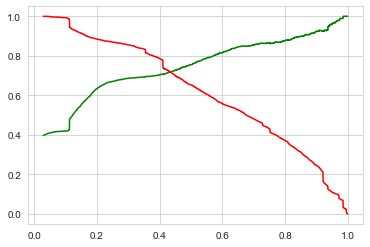

In [143]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [144]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
X_test = X_test[col5]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Specialization_Others
3271,0,-0.591008,0,0,0,0,0,0,0,1
1490,0,1.894051,1,0,0,0,0,0,0,0
7936,0,-0.743117,0,0,0,0,0,0,0,1
4216,0,-0.878732,0,1,0,0,0,0,0,0
3830,0,-0.578179,1,0,0,0,0,0,0,0


In [146]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [147]:
y_test_pred = res.predict(X_test_sm)

In [148]:
y_test_pred[:10]

3271    0.145123
1490    0.655572
7936    0.127297
4216    0.921322
3830    0.139212
1800    0.121033
6507    0.455017
4821    0.294186
4223    0.936753
4714    0.113014
dtype: float64

In [149]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [150]:
# Let's see the head
y_pred_1.head()

,0
3271,0.145123
1490,0.655572
7936,0.127297
4216,0.921322
3830,0.139212


In [151]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [152]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [153]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [154]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [155]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.145123
1,1,1490,0.655572
2,0,7936,0.127297
3,1,4216,0.921322
4,0,3830,0.139212


In [156]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [157]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)
y_pred_final.reindex

<bound method DataFrame.reindex of       Prospect ID  Converted  Converted_prob
0            3271          0        0.145123
1            1490          1        0.655572
2            7936          0        0.127297
3            4216          1        0.921322
4            3830          0        0.139212
...           ...        ...             ...
2718          850          0        0.148061
2719         2879          0        0.100786
2720         6501          1        0.883263
2721         7155          0        0.234989
2722          376          0        0.191282

[2723 rows x 3 columns]>

In [158]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.145123
1,1490,1,0.655572
2,7936,0,0.127297
3,4216,1,0.921322
4,3830,0,0.139212


In [159]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [160]:
y_pred_final.head()


,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.145123,0
1,1490,1,0.655572,1
2,7936,0,0.127297,0
3,4216,1,0.921322,1
4,3830,0,0.139212,0


In [161]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7847961806830701

In [162]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1333,  401],
       [ 185,  804]], dtype=int64)

In [163]:
TP= confusion2[1,1] 
TN= confusion2[0,0]
FN= confusion2[1,0]
FP= confusion2[0,1]

In [164]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8129423660262892

In [165]:
# Let us calculate specificity
TN / float(TN+FP)

0.7687427912341407